import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题f

In [2]:
comment = pd.read_csv(r'E:\spider\spider\maoyan\maoyan_comment_4.csv')

In [3]:
comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136560 entries, 0 to 136559
Data columns (total 5 columns):
cityName     136483 non-null object
content      136560 non-null object
nickName     136560 non-null object
score        136560 non-null float64
startTime    136560 non-null object
dtypes: float64(1), object(4)
memory usage: 5.2+ MB


In [4]:
comment.drop_duplicates(['nickName', 'cityName'], inplace=True)
# 去重

In [5]:
comment.dropna()
#  清洗缺失值
comment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135366 entries, 0 to 136559
Data columns (total 5 columns):
cityName     135289 non-null object
content      135366 non-null object
nickName     135366 non-null object
score        135366 non-null float64
startTime    135366 non-null object
dtypes: float64(1), object(4)
memory usage: 6.2+ MB


In [24]:
import json
with open('city_coordinates.json', 'r', encoding='utf-8') as f:
    city_name = json.load(f).keys()
# print(city_name)
citys = comment.loc[:, 'cityName']
citys_num = pd.DataFrame({'city':citys}).apply(pd.value_counts)
data = []
for city in citys_num.index:
    #  数据里城市名称要与pyecharts中的城市名称一致
    if city in city_name:
        dct = {}
        dct[city] = citys_num.loc[city][0]
        data.append(dct)
data
# 城市统计

[{'北京': 5818},
 {'深圳': 5284},
 {'广州': 4813},
 {'上海': 4716},
 {'成都': 3831},
 {'武汉': 3029},
 {'重庆': 2510},
 {'南京': 2393},
 {'西安': 2367},
 {'天津': 2271},
 {'郑州': 2225},
 {'长沙': 2127},
 {'沈阳': 2095},
 {'东莞': 2081},
 {'哈尔滨': 1767},
 {'昆明': 1714},
 {'杭州': 1597},
 {'佛山': 1590},
 {'大连': 1521},
 {'长春': 1385},
 {'合肥': 1295},
 {'苏州': 1253},
 {'青岛': 1219},
 {'无锡': 1178},
 {'中山': 1174},
 {'南宁': 1117},
 {'常州': 1075},
 {'海口': 1010},
 {'乌鲁木齐': 989},
 {'珠海': 943},
 {'贵阳': 929},
 {'石家庄': 917},
 {'呼和浩特': 870},
 {'宁波': 844},
 {'南昌': 810},
 {'顺德': 801},
 {'福州': 786},
 {'太原': 740},
 {'济南': 721},
 {'南通': 644},
 {'惠州': 631},
 {'徐州': 594},
 {'鞍山': 584},
 {'兰州': 565},
 {'昆山': 550},
 {'汕头': 533},
 {'包头': 524},
 {'襄阳': 507},
 {'厦门': 506},
 {'张家港': 497},
 {'芜湖': 488},
 {'江门': 484},
 {'银川': 470},
 {'柳州': 443},
 {'西宁': 442},
 {'吉林': 426},
 {'唐山': 414},
 {'台州': 411},
 {'绵阳': 399},
 {'临沂': 388},
 {'南阳': 387},
 {'宜昌': 385},
 {'淮安': 383},
 {'洛阳': 378},
 {'烟台': 375},
 {'遵义': 362},
 {'秦皇岛': 359},
 {'盐城': 358},
 {'淄博': 357}

In [25]:
from pyecharts import Geo, Map

In [27]:
geo = Geo("城市分布", "data from citys", title_color="#fff", title_pos="center", width=1000, height=600, background_color='#404a59')
attr, value = geo.cast(data)

geo.add("", attr, value, visual_range=[0, 200], maptype='china', visual_text_color="#fff", symbol_size=10, is_visualmap=True)

geo.render("城市分布.html")#生成html文件
geo


In [28]:
scores = comment.loc[:, 'score'].value_counts()
# 分数统计

Text(0.5,1,'评分统计')

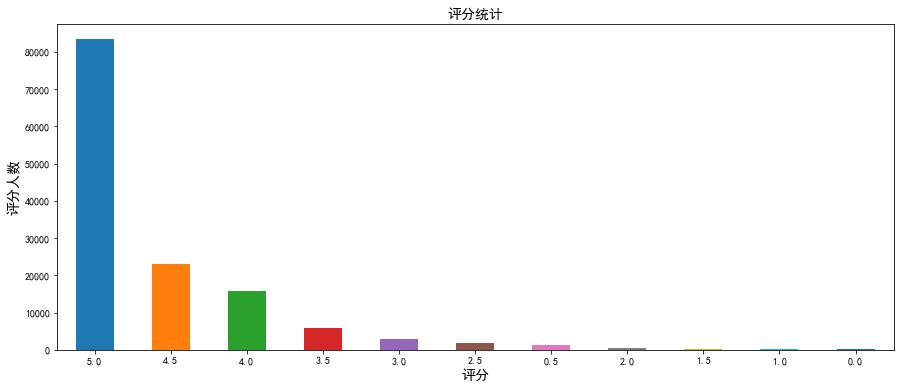

In [29]:
comment.loc[:, 'score'].value_counts().plot.bar(figsize=(15,6), rot=0)
plt.xlabel('评分', fontsize=14)
plt.ylabel("评分人数", fontsize=14)
plt.title('评分统计', fontsize=14)